### Part I: Implement hybrid recommendation
- Starting from the existing WeightedHybrid class in the hybrid.py file, implement a linear weighted hybrid within Surprise. The class will have the following capabilities:
- The constructor can take any number of components in its constructor.
- The fitting process should fit all the components and then use linear regression of errors in the test data to find the optimal weights for each component.
- The weights should be normalized to sum to 1.0 with negative weights set to zero.
- The prediction process should calculate predictions for each component and then created a weighted sum for the final prediction.
- Note that the prediction process outputs a Prediction object. All information created by the component predictors should be represented in the output Prediction object.
- Verify that your implementation is correct by running the unit tests at the end of the sigweight.py file.

### Part II: Experiments
- Verify your implementation with the Test Code at the bottom of the Homework 4 jupyter notebook.
- Using the MovieLens 100k data set, compare a hybrid of user- and item-based collaborative recommendation with the performance of each algorithm separately.
- Use 5-fold cross-validation.
- Produce a boxplot of the RMSE values

Hybrid / ensemble recommendation

## Load libraries
Generic libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Surprise

In [2]:
from surprise import KNNWithMeans, SVD, SVDpp, CoClustering, NMF, SlopeOne, BaselineOnly
from surprise import Reader, Dataset
from surprise.model_selection import cross_validate, KFold

WeightedHybrid from first part of assignment

In [3]:
%load_ext autoreload
%autoreload
from hybrid import WeightedHybrid

## Experiments

In [4]:

data = Dataset.load_builtin('ml-100k')
fold5 = KFold(n_splits=5, random_state=1, shuffle=False)
algo1 = KNNWithMeans(k=2, sim_options={'name': 'cosine', 'user_based': True})
algo2 = KNNWithMeans(k=2, sim_options={'name': 'cosine', 'user_based': False})
hybrid = WeightedHybrid([algo1, algo2])


In [5]:
output1 = cross_validate(algo1, data, measures=['RMSE'], cv=fold5, verbose=True)

Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1433  1.1397  1.1395  1.1366  1.1360  1.1390  0.0026  
Fit time          1.55    1.65    1.59    1.41    1.01    1.44    0.23    
Test time         1.38    1.29    1.30    1.29    1.30    1.31    0.03    


In [6]:
output2 = cross_validate(algo2, data, measures=['RMSE'], cv=fold5, verbose=True)

Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1495  1.1351  1.1312  1.1215  1.1266  1.1328  0.0095  
Fit time          2.29    2.23    2.16    2.10    1.81    2.12    0.17    
Test time         1.26    1.43    1.46    1.37    1.28    1.36    0.08    


In [7]:
output3 = cross_validate(hybrid, data, measures=['RMSE'], cv=fold5, verbose=True)

Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
The weight before normalizing [0.70766489 0.41250277]
Learned weights [0.632 0.368]
The weight before normalizing [0.70823004 0.40656603]
Learned weights [0.635 0.365]
The weight before normalizing [0.72019753 0.38742299]
Learned weights [0.65 0.35]
The weight before normalizing [0.7269493  0.38744162]
Learned weights [0.652 0.348]
Computing the cosine similarity matrix...
Done computing s

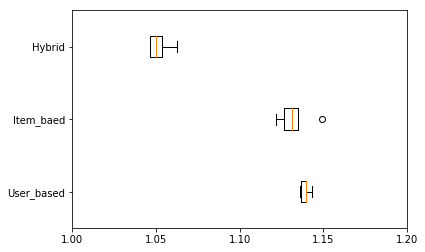

In [8]:
rmse = [output1['test_rmse'], output2['test_rmse'],output3['test_rmse']]
plt.boxplot(rmse, labels = ['User_based','Item_baed','Hybrid'], vert = False)
plt.xticks([1.00, 1.05, 1.10, 1.15, 1.20])
plt.show()

# Test Code
### Don't change anything below this line. Use it to test your implementation
Imports

In [9]:
from surprise.model_selection import PredefinedKFold
from surprise.accuracy import rmse
from surprise import Reader, Dataset


Read test data

In [10]:
TEST_reader = Reader(line_format='user item rating', sep=',', skip_lines=1)
TEST_train_file = 'test-data-train.csv'
TEST_test_file = 'test-data-test.csv'
TEST_folds_files = [(TEST_train_file, TEST_test_file)]

TEST_data = Dataset.load_from_folds(TEST_folds_files, reader=TEST_reader)

Create single split

In [11]:
TEST_pkf = PredefinedKFold()
TEST_trainset, TEST_testset = next(TEST_pkf.split(TEST_data))

Run algorithm

In [12]:
%load_ext autoreload
%autoreload
TEST_algo1 = KNNWithMeans(k=2, sim_options={'name': 'cosine', 'user_based': True})
TEST_algo2 = KNNWithMeans(k=2, sim_options={'name': 'cosine', 'user_based': False})

TEST_hybrid = WeightedHybrid([TEST_algo1, TEST_algo2])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
TEST_correct_weights = [0.380, 0.620]
TEST_epsilon = 0.001

TEST_hybrid.fit(TEST_trainset)

TEST_weights = TEST_hybrid.get_weights()

if np.abs(TEST_weights[0] - TEST_correct_weights[0]) < TEST_epsilon and \
    np.abs(TEST_weights[1] - TEST_correct_weights[1]) < TEST_epsilon:
    print("Your implementation is correct.")
else:
    print("Your implementation is not correct. Keep working.")

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
The weight before normalizing [0.46115227 0.75093136]
Learned weights [0.38 0.62]
Your implementation is correct.


In [14]:
TEST_correct_rmse = 2.7840

TEST_pred = TEST_hybrid.test(TEST_testset)

TEST_rmse = rmse(TEST_pred)

if np.abs(TEST_rmse - TEST_correct_rmse) < TEST_epsilon:
    print("Your implementation is correct.")
else:
    print("Your implementation is not correct. Keep working.")

RMSE: 2.7842
Your implementation is correct.
